In [115]:
import pandas as pd 
import ta  
import numpy as np  
from tqdm import tqdm  
import pandas_ta as pda  
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm

In [116]:
from mpl_toolkits.mplot3d import axes3d

In [117]:
coin_dash=pd.read_csv("/Users/midou/Desktop/dashbord11_coin.csv")   
  

In [118]:
##optimiser trix pour le bitcoin  
coin_dash=coin_dash.set_index(coin_dash["timestamp"])  
coin_dash_train=coin_dash[:500] #'2020-8-10'
coin_dash_test=coin_dash[500:]
data=[coin_dash_train ,coin_dash_test] 

In [119]:
paire_name = ["XRPUSDT","BTCUSDT","DASHUSDT","ZRXUSDT","ETHUSDT","XMRUSDT","LTCUSDT"] 
ded=[0,1]

In [121]:
def plot_for_me (x , y ,z ,title) :
    fig = plt.figure()
    ax = fig.gca(projection='3d')  # Affichage en 3D
    ax.plot_trisurf(x, y, z,cmap=cm.coolwarm ,linewidth=0, antialiased=False) # Tracé d'une surface
    plt.title(title)
    ax.set_xlabel('i')
    ax.set_ylabel('j')
    ax.set_zlabel('value')
    plt.tight_layout()
    plt.show 

In [122]:
def simule_trix (df ,name) :  
    simule=pd.DataFrame() 
    for i in range(10,200 ,5): 
            for j in range(40,250 ,10) :  
                coin=0 
                m=1000 
                trix_length= i  ## 
                trix_signal=j ##
                df["TRIX"]=ta.trend.ema_indicator(
                ta.trend.ema_indicator(ta.trend.ema_indicator(
                   df['close '+ name],window=trix_length),window=trix_length),window=trix_length)  
                df["TRIX_PCT"]=df["TRIX"].pct_change()*100   #### corriger en point d'echage 
                df["TRIX_singal"]=ta.trend.sma_indicator(df["TRIX_PCT"],trix_signal) 
                df["TRIX_histo"]=df["TRIX_PCT"]-df["TRIX_singal"]  
                df["stoch_rsi"]=ta.momentum.stochrsi(df["close "+name] ,
                                                            window=14 ,smooth1=3 ,smooth2=3) 
                rotter=[] 
                for index, row in df.iterrows() : 
                    if df['TRIX_histo'][index] >0 and df['stoch_rsi'][index]<0.8 and m>0  : 
                        coin=m/df['close '+name][index]  
                        coin=coin-coin*0.007 
                        bot_portefeuille = m +coin*df['close '+name][index]
                        chik={'i '+name:i , 'j '+name:j ,'value '+name:bot_portefeuille}
                        rotter.append(chik)  
                
                    if df['TRIX_histo'][index] <0 and df['stoch_rsi'][index]>0.2 and coin>0 :   
                        m=coin*df['close '+name][index] 
                        m=m-m*0.007 
                        coin=0 
                        bot_portefeuille = m +coin*df['close '+name][index]  
                        chik={'i '+name :i , 'j '+name:j ,'value '+name :bot_portefeuille}  
                        rotter.append(chik)  
                 
                dt=pd.DataFrame(rotter)  
                clock=dt.iloc[-1:]  
                simule=simule.append(clock)  
    return simule
   

  0%|          | 0/2 [00:00<?, ?it/s]/var/folders/4k/2v2nn1sn1k1f7dtmr6ny96vh0000gn/T/ipykernel_2657/771668891.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TRIX"]=ta.trend.ema_indicator(
/var/folders/4k/2v2nn1sn1k1f7dtmr6ny96vh0000gn/T/ipykernel_2657/771668891.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TRIX_PCT"]=df["TRIX"].pct_change()*100   #### corriger en point d'echage
/var/folders/4k/2v2nn1sn1k1f7dtmr6ny96vh0000gn/T/ipykernel_2657/771668891.py:13: SettingWithCopyWarning: 
A va

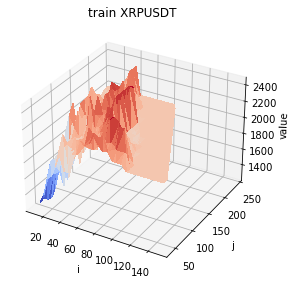

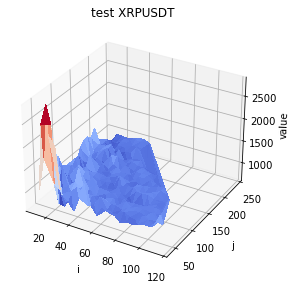

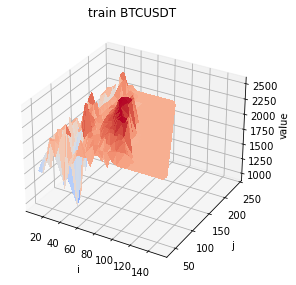

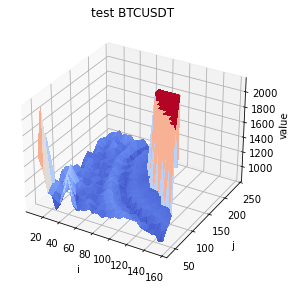

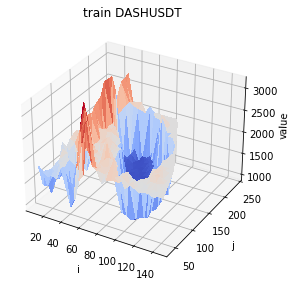

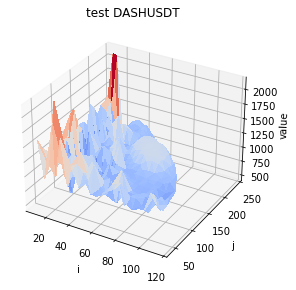

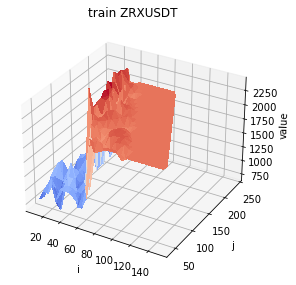

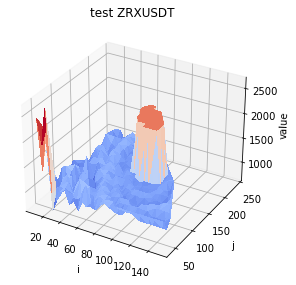

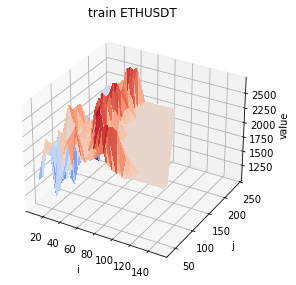

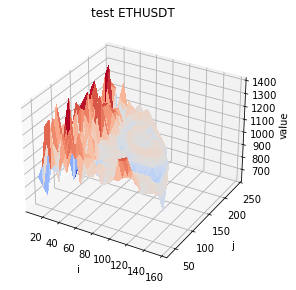

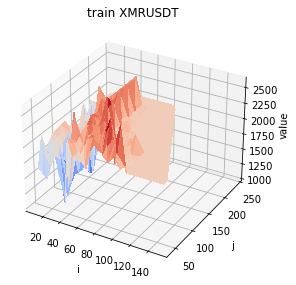

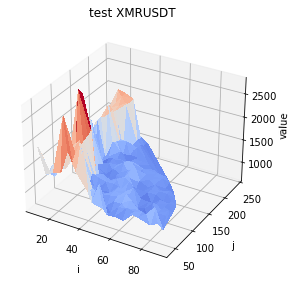

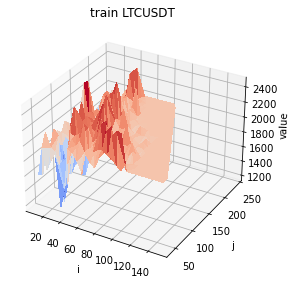

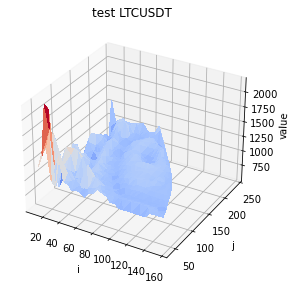

In [124]:
for name in tqdm(paire_name) :  
    for d in tqdm(ded) :  
        if d==0 :  
            train=simule_trix (data[d] ,name)  
            plot_for_me (train['i '+name], train['j '+name] ,
                         train['value '+name] , 'train '+name )
        if d==1 :   
            test=simule_trix (data[d] ,name)  
            plot_for_me(test['i '+name], test['j '+name] , test['value '+name] , 'test '+name )
    
            
        
        
    

In [ ]:
#paremetere selection  
## we see the graph train vs test  

In [143]:
 ##for btc 105 150 
 ## for xrp 20 100 
 ## for dash 25 200 
 ## for zrx 100 150  
 ## for eth 40 200  
 ## for XMR 25 100 
 ## for LTC 20 50  

In [ ]:
i_trix=[20,105,25,100,40,25,20]
j_trix=[100,150,200,150,200,100,50] 

In [172]:
def simule_super(df , name):  
    simule =pd.DataFrame()
    rowslist =[] 
    myrange=np.arange(1.0,20.0,3.5)
    for i in range(10,150,10): 
        for j in range(10 ,200,20) : 
            for z in myrange:
                coin=0 
                m=1000  
                ST_length = j
                ST_multiplier = z
                superTrend = pda.supertrend(df['high '+name], df['low '+name], df['close '+name], 
                                        length=ST_length, multiplier=ST_multiplier)
                df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
                df['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]
                
                ST_length = j*2
                ST_multiplier = z*2.0
                superTrend = pda.supertrend(df['high '+name], df['low '+name], df['close '+name],
                                        length=ST_length, multiplier=ST_multiplier)
                df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
                df['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

                ST_length = j*2
                ST_multiplier = z*2.0
                superTrend = pda.supertrend(df['high '+name], df['low '+name], df['close '+name], 
                                        length=ST_length, multiplier=ST_multiplier)
                df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
                df['SUPER_TREND_DIRECTION3'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]
                df['EMA50']=ta.trend.sma_indicator(df['close '+name], i) 
                df['STOCH_RSI']=ta.momentum.stochrsi(df["close "+name] , window=14 ,smooth1=3 ,smooth2=3) 
                rotter=[]
               
                for index, row in df.iterrows() : 
                    if (row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 
                       and row['STOCH_RSI'] < 0.8 and row['close '+name]>row['EMA50'] and m > 0): 
                        coin=m/df['close '+name][index]  
                        coin=coin-coin*0.007 
                        bot_portefeuille = m +coin*df['close '+name][index]
                        chik={'i '+name:i , 'j '+name:j,'z '+name: z ,'value '+name:bot_portefeuille}
                        rotter.append(chik)  
                
                    if (row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1 
                        and row['STOCH_RSI'] > 0.2 and coin > 0):  
                        m=coin*df['close '+name][index] 
                        m=m-m*0.007 
                        coin=0 
                        bot_portefeuille = m +coin*df['close '+name][index]  
                        chik={'i '+name :i , 'j '+name:j ,'z '+name: z,' value '+name :bot_portefeuille}  
                        rotter.append(chik)  
                 
                dt=pd.DataFrame(rotter)  
                clock=dt.iloc[-1:]  
                simule=simule.append(clock)  
    return simule
    

In [152]:
def plot_for_me2 (x , y ,z ,n,title) :
    fig = plt.figure()
    ax = fig.gca(projection='3d')  # Affichage en 3D
    ax.plot_trisurf(x, y, z,cmap=cm.jet(n) ,linewidth=0, antialiased=False) # Tracé d'une surface
    plt.title(title)
    ax.set_xlabel('i')
    ax.set_ylabel('j')
    ax.set_zlabel('value')
    plt.tight_layout()
    plt.show 

In [156]:
def most_per(df , name ,n) :
    df=df.sort_values(by='value '+name, ascending=False) 
    df=df[:50] 
    return df 